## Data Frame Cleaning and Quantitative Variable Descriptive Analytics

## <u>Case Study</u>: Steam Game Play and Purchase Analysis
Steam is the world's most popular PC Gaming hub. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools can be super valuable for Steam. What can we learn about Steam gaming behavior?

The dataset we will be analyzing is comprised of a random sample of 500 steam users and their game play and purchase behaviors. It has the following columns:
* user_id
* game_name,
* activity:
    - purchase: indicating that the user has *purchased* the corresponding game
    - play: indicating that the user has *played* the corresponding game (for at least some amount of time.) 
* hours_played_if_play:
    - if the row corresponds to a 'play' activity, this number represents the number of hours the user has played the game
    - if the row corresponds to a 'purchase' activity, this number is always a 1 (and means nothing... it's a placeholder).
    
This is the same data that you worked with in Lab 2.

<hr>

## Package Imports

We'll import four Python packages that we've used so far and will need for this assignment.  Those packages are pandas, numpy, matplotlib.pyplot, and seaborn.  

Run the cell provided below to access the functions in these packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Tutorial

*Hint*: we can index the output of the shape attribute like a list.  See the Tutorial provided below for an example.

You may find this helpful as you work on this Homework assignment.

In [2]:
#Tutorial
import pandas as pd
demo_df=pd.DataFrame({'a': [1,2,3], 'b': [4,5,6]})
demo_df

,a,b
0,1,4
1,2,5
2,3,6


In [3]:
#Tutorial
print(demo_df.shape)
print(demo_df.shape[0])
print(demo_df.shape[1])

(3, 2)
3
2


## 1. Read in the Data 

Read in the steam_sample.csv data.

In [4]:
df = pd.read_csv('steam_sample.csv')

In [5]:
print(df.shape)

(7806, 4)


## 2. Cleaning the Data

We plan to analyze the "hours_played_if_play" variable from the steam data.

Before beginning our analysis, we need to prepare the data.  To do so, one step is to check for missing data.  While doing so, be sure to pay careful attention to our variable of interest.

Complete the following steps to clean the data:

1. Identify values (if any) that have been encoded in the csv to represent a **missing value**.
2. Read in the csv file so that the missing values are written as NaN in the data.
3. Confirm that the "hours_played_if_play" is recognized as numerical values (either float64 or int64 type).
4. Delete any rows from your data that have missing values.
5. Report the number of observations dropped from the data.

In [6]:
df.head()

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1
1,308653033,Unturned,play,0.6
2,308653033,theHunter,purchase,1
3,144004384,Dota 2,purchase,1
4,144004384,Dota 2,play,22


In [7]:
df['user_id'].unique()

array([308653033, 144004384,  54103616,  49769103, 239397807, 171847029,
        92173524,  92342574, 173857208,  95898619, 219446813, 227153589,
       246892835, 139352395, 115003799, 149501464,  60760816, 144508237,
       214388411, 303269114, 176033341, 227777777, 127813787,  87071236,
        76319436, 156458299, 139854220, 135177440, 299833904, 299914260,
       204495708, 299440710, 158655873, 184899103, 108183518, 159777976,
       242094123, 110489310,  33479807, 202585832, 218292423, 141246626,
       106147454, 126876615, 242471645, 206155181,  32749624,  55906627,
       257422299, 123546767, 252200924, 249570072, 138460230,  28633466,
       136341868, 149081421,  35729292, 219554846, 197279094, 160844169,
       185914106, 156742049,  73094226, 163801892, 252540851, 254814380,
        23096237, 304435173,  82448039,  99077905, 249096057, 252159775,
       150386429, 124763074, 188768764, 298557690, 120055850,  25445382,
       294834367,  35021321, 115163074, 122188548, 

In [8]:
df['game_name'].unique()

array(['Unturned', 'theHunter', 'Dota 2', ..., 'Diner Dash Hometown Hero',
       'DinerTown Tycoon', 'Ori and the Blind Forest'], dtype=object)

In [9]:
df['activity'].unique()

array(['purchase', 'play'], dtype=object)

In [10]:
df['hours_played_if_play'].unique()

array(['1', '0.6', '22', '1028', '1008', '148', '108', '72', '36', '35',
       '32', '21', '16', '15.8', '8.6', '7.8', '7.3', '3.1', '1.9', '1.7',
       '1.1', '0.4', '153', '63', '26', '1.4', '639', '479', '70', '65',
       '33', '30', '19.8', '16.2', '11.3', '4.2', '3.9', '2.3', '0.8',
       '0.7', '0.5', '0.3', '396', '227', '13.4', '12.6', '11.2', '10.1',
       '2.4', '210', '1.2', '0.2', '13.2', '48', '110', '0.1', '67',
       '429', '5.5', '61', '1.6', '18.3', '9.9', '4.7', '1714', '441',
       '197', '147', '117', '86', '73', '49', '46', '31', '24', '20',
       '19.7', '18.2', '14.2', '11.6', '9.8', '9.7', '8.4', '6.5', '4.8',
       '4.1', '3.7', '2.9', '2.7', '2.1', '222', 'unknown', '14.9',
       '14.1', '83', '11.1', '3.2', '6.9', '395', '251', '9.3', '7.4',
       '54', '34', '1.8', '99', '98', '96', '29', '27', '23', '19.1',
       '18.7', '17.5', '17', '16.6', '14.7', '13.3', '10.7', '10.2', '10',
       '9.6', '9.5', '8', '7.9', '7.6', '7', '6.6', '6', '5.8', '5

There is a missing value "unknown" in the column "hours_played_if_play". 

In [11]:
df = pd.read_csv('steam_sample.csv', na_values= "unknown")

In [12]:
df['hours_played_if_play'].dtype

dtype('float64')

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

user_id                 0
game_name               0
activity                0
hours_played_if_play    0
dtype: int64

In [15]:
print(df.shape)

(7800, 4)


6 rows were dropped out from the original dataset. 

## 3. Purchases & Played Games

**a)** Separate the Steam data into two different data frames:

- one for the user-game entries that have been played
- one for the user-game entries that represent purchases

In [16]:
played = df[df['activity'] == "play"]

In [17]:
purchase = df[df['activity'] == "purchase"]

**b)** What proportion of games purchased have been played?

In [18]:
print(played.shape[0] / df.shape[0])

0.3682051282051282


## 4. A High Game User

**a)** Extract the row, which represents a user-game combination, that has the **sixth** highest amount of total hours played in the dataset.

In [39]:
df.sort_values(by='hours_played_if_play', ascending=False).iloc[[5],:]


,user_id,game_name,activity,hours_played_if_play
5463,39911920,Counter-Strike,play,2258.0


**b)** Filter the data to contain only the transactions (purchases and games played) for this user.  Display this data frame.

In [40]:
df_user = df[df['user_id'] == 39911920]
df_user

,user_id,game_name,activity,hours_played_if_play
5462,39911920,Counter-Strike,purchase,1.0
5463,39911920,Counter-Strike,play,2258.0
5464,39911920,Counter-Strike Condition Zero,purchase,1.0
5465,39911920,Counter-Strike Condition Zero,play,32.0
5466,39911920,Counter-Strike Condition Zero Deleted Scenes,purchase,1.0
5467,39911920,Day of Defeat,purchase,1.0
5468,39911920,Deathmatch Classic,purchase,1.0
5469,39911920,Ricochet,purchase,1.0


**c)** Calculate the percentage of purchased games that this user actually played.  

**To get full credit, you should do this in one line of code using the dataframe created in part 4b**.

In [43]:
df_user[df_user['activity'] == 'play'].shape[0] / df_user.shape[0]

0.25

## 5. Distribution of Hours Played

We will now focus on the time spent playing games.  

Generate a **frequency** histogram for the time spent playing an individual game by an individual user.  Make sure to include clear axes labels and titles on your graph.  Then, describe the distribution.

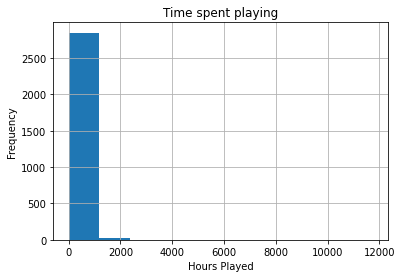

In [22]:
played['hours_played_if_play'].hist()
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Time spent playing')
plt.show()

In [23]:
played['hours_played_if_play'].max()

11754.0

For its shape, it is unimodal and it is skewed right. 

It is hard to know the exact number of the center of this distribution, but it is supposed to have a peak around 500 (hours played). 

The observation of hours played is approximately up to 12,000(hours).

## 6. Low and High Game Users

**a)** Calculate the minimum time spent playing a game in our data.  How many rows represent user-game combinations that were played for the minimum number of hours?

In [24]:
played['hours_played_if_play'].min()

0.1

In [25]:
played[played['hours_played_if_play'] == 0.1].shape[0]

67

There are 67 rows of user-game combination that were played for the minimum number of hours(0.1). 

**b)** Repeat the calculation from part a for the maximum time spent playing a game.

In [26]:
played['hours_played_if_play'].max()

11754.0

In [27]:
played[played['hours_played_if_play'] == 11754].shape[0]

1

There are 1 row of user-game combination that were played for the minimum number of hours(11754). 

## 7. Comparing Play Times of Two Games 

We want to compare the play times that users spent with two games of different genres:

- Counter-Strike is a first-person shooter game
- Sid Meier's Civilization V is a turn-based strategy game

**a)** First, filter the data to create two separate data frames that contain the play times for users of these two games.  How many users played each of these two games?  

*Note*: calculating the number of users with Python is sufficient; you do not need to report the number of users in a Markdown cell.

In [28]:
counter_strike = played[played['game_name'] == "Counter-Strike"]
civilization = played[played['game_name'] == "Sid Meier's Civilization V"]

In [29]:
print(counter_strike.shape[0])
print(civilization.shape[0])

30
20


**b)** Stack the separate data frames from part **a** into one data frame.  Then, generate a side-by-side box plot of the play times for these two games.

In [30]:
fulldf = pd.concat([counter_strike, civilization], ignore_index=True) 
fulldf 

,user_id,game_name,activity,hours_played_if_play
0,54103616,Counter-Strike,play,1008.0
1,95898619,Counter-Strike,play,2.4
2,87071236,Counter-Strike,play,31.0
3,76319436,Counter-Strike,play,3.7
4,32749624,Counter-Strike,play,4814.0
5,35729292,Counter-Strike,play,370.0
6,54477968,Counter-Strike,play,15.2
7,47164966,Counter-Strike,play,646.0
8,14153959,Counter-Strike,play,2.0
9,36611463,Counter-Strike,play,1.7


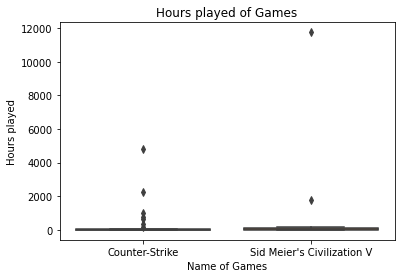

In [31]:
sns.boxplot(x = 'game_name', y = 'hours_played_if_play', data = fulldf)
plt.title('Hours played of Games')
plt.xlabel('Name of Games')
plt.ylabel('Hours played')
plt.show()

**c)** Calculate two sets of summary statistics, one for each game above.  Be sure to include the five number summary, mean, and standard deviation of the play times.

In [32]:
def mysummary(DataFrame):
    index = ['min', 'Q1', 'med', 'Q3', 'max', 'mean', 'std']
    value = [DataFrame.min(),
            DataFrame.quantile(q=0.25),
            DataFrame.median(),
            DataFrame.quantile(q=0.75),
            DataFrame.max(),
            DataFrame.mean(),
            DataFrame.std()]
    return pd.DataFrame({'value': value}, index = index)

In [33]:
mysummary(counter_strike['hours_played_if_play'])

,value
min,0.200000
Q1,1.625000
med,7.750000
Q3,47.750000
max,4814.000000
mean,342.436667
std,964.242763


In [34]:
mysummary(civilization['hours_played_if_play'])

,value
min,0.500000
Q1,10.875000
med,43.000000
Q3,109.750000
max,11754.000000
mean,724.500000
std,2624.251107


**d)** Finally, do the two distributions for the different games seem to be remarkably different?  Explain.

Yes. The distrubutions of played hours for two different games seem to be remarkably different. 

Most of all, the standard deviation of game 'Sid Meier's Civilization V' (2624) is higher than the one of game 'Counter-Strike'(964). 

This stands for the data of 'Sid Meier's Civilization V' is more widely spread than 'Counter Strike'. 

The reason why standard deviation of 'Sid Meier's Civilization V' was higher could be supposed because of the outliers which have high values. The maximum hours played of this game is 11754 hours, which is extremely higher than the median hours played, which is 43 hours. 